In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep='\t')

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')

In [7]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


***EDA & INSIGHTS***

In [8]:
customer_education_level=data['Education'].value_counts()
customer_education_level 

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [9]:
fig = px.bar(data['Education'].value_counts(),
             color=data['Education'].value_counts().index,
             template='plotly_dark',
             text_auto=True,
             labels={'value':'count'},
             title='Distribution of Customer Education Level'
            )
pio.renderers.default = 'iframe'
fig.show()

In [10]:
Martial_Status=data['Marital_Status'].value_counts()
Martial_Status

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
fig = px.bar(data['Marital_Status'].value_counts(),
             color=data['Marital_Status'].value_counts().index,
             template='plotly_dark',
             text_auto=True,
             labels={'value':'count'},
             title='Distribution of Customer Marital status'
            )
pio.renderers.default = 'iframe'
fig.show()

In [12]:
data['Income'].mean()

52247.25135379061

In [13]:
data['Age']=2025-data['Year_Birth']

In [14]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,58
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,79
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,44
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,69


In [15]:
data['Age'].mean().astype('int')

56

In [16]:
income_by_kids=data.groupby('Kidhome')['Income'].mean()
income_by_kids

Kidhome
0    61779.858145
1    39138.076663
2    39149.500000
Name: Income, dtype: float64

In [17]:
fig = px.bar(income_by_kids,
             color=income_by_kids.index,
             template='plotly_dark',
             text_auto=True,
             labels={'value':'AVG'},
             title='Distribution of income by kids'
            )
pio.renderers.default = 'iframe'
fig.show()

In [18]:
income_by_teenager=data.groupby('Teenhome')['Income'].mean()

In [19]:
fig = px.bar(income_by_teenager,
             color=income_by_teenager.index,
             template='plotly_dark',
             text_auto=True,
             labels={'value':'AVG'},
             title='Distribution of income by teenager'
            )
pio.renderers.default = 'iframe'
fig.show()

In [20]:
income_by_Education=data.groupby('Education')['Income'].mean()
income_by_Education

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [21]:
fig = px.bar(income_by_Education,
             color=income_by_Education.index,
             template='plotly_dark',
             text_auto=True,
             labels={'value':'AVG'},
             title='Distribution of income by education'
            )
pio.renderers.default = 'iframe'
fig.show()

In [22]:
income_by_martial_status=data.groupby('Marital_Status')['Income'].mean()
income_by_martial_status

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51724.978996
Single      50995.350318
Together    53245.534031
Widow       56481.552632
YOLO        48432.000000
Name: Income, dtype: float64

In [23]:
fig = px.bar(income_by_martial_status,
             color=income_by_martial_status.index,
             template='plotly_dark',
             text_auto=True,
             labels={'value':'AVG'},
             title='Distribution of income by marital status'
            )
pio.renderers.default = 'iframe'
fig.show()

In [24]:
edu_by_marital_status=pd.crosstab(data['Education'],data['Marital_Status'])
edu_by_marital_status

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0,0,23,81,37,57,5,0
Basic,0,0,1,20,18,14,1,0
Graduation,1,1,119,433,252,286,35,0
Master,1,1,37,138,75,106,12,0
PhD,0,1,52,192,98,117,24,2


In [25]:
interest_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                       'MntSweetProducts', 'MntGoldProds']
correlation_matrix= data[interest_columns].corr()
correlation_matrix

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.030128,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,-0.027225,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,0.040207,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.003138,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.013231,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693
Complain,-0.030128,-0.027225,0.040207,0.003138,0.013231,1.000000,-0.039007,-0.005166,-0.023483,-0.020953,-0.022485,-0.030861
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,-0.039007,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,-0.005166,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,-0.023483,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,-0.020953,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875


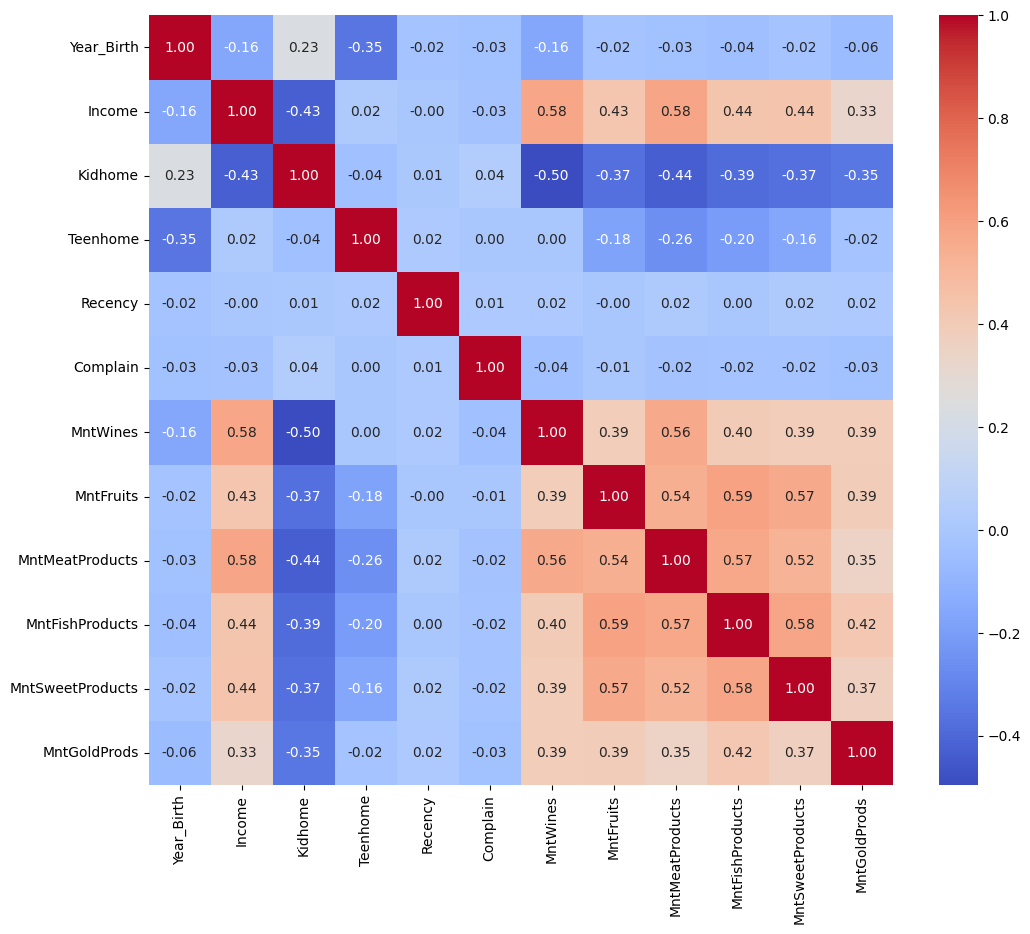

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' ,fmt=".2f")
plt.show()

In [27]:
amounts=data.columns.tolist()[8:14]

In [28]:
data[amounts].sum()

Recency             110005
MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
dtype: int64

In [29]:
data.groupby('Marital_Status')[amounts].sum()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
Marital_Status,,,,,,
Absurd,106,711,169,625,411,61
Alone,91,554,12,79,23,21
Divorced,11481,75364,6363,34848,8130,6222
Married,41712,258751,22235,138829,30569,23070
Single,23763,138399,12881,87412,18344,13086
Together,29062,177959,14703,97500,22615,15151
Widow,3784,28434,2548,14575,3957,3004
YOLO,6,644,6,100,8,6


In [30]:
type_of_purchases=data.columns.tolist()[14:18]
type_of_purchases

['MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases']

In [31]:
fig = px.bar(data[type_of_purchases].sum(),
             color=type_of_purchases,
             template='plotly_dark',
             text_auto=True,
             labels={'value':'count'},
             title='Distribution of purchases'
            )
pio.renderers.default = 'iframe'
fig.show()

In [32]:
amounts=data.columns.tolist()[8:14]

In [33]:
data[amounts].sum()

Recency             110005
MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
dtype: int64

In [34]:
fig = px.bar(data[amounts].sum(),
             color=amounts,
             template='plotly_dark',
             text_auto=True,
             labels={'value':'count'},
             title='Distribution of amounts of drink'
            )
pio.renderers.default = 'iframe'
fig.show()

***Encoding Catrgorical Columns***

In [35]:
categorical_columns=data.select_dtypes(include='object').columns
categorical_columns

Index(['Education', 'Marital_Status'], dtype='object')

In [36]:
dummies=pd.get_dummies(categorical_columns,dtype=int)

In [37]:
data=pd.concat([data,dummies],axis=1)
data.drop(columns=categorical_columns,inplace=True)

In [38]:
data

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,0,3,11,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,0,0,0,3,11,0,58
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,0,0,0,1,0,0,3,11,0,79
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,0,1,0,0,0,0,3,11,0,44
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,0,0,0,0,0,0,3,11,0,69


***Preprocessing***

In [39]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [40]:
data.drop(["ID","Year_Birth","Z_CostContact","Z_Revenue","Dt_Customer"], axis=1, inplace=True)

In [41]:
income_outlier=data[data['Income']>400000].index

In [42]:
data.drop(income_outlier,axis=0,inplace=True)

***Modeling***

In [43]:
pca = PCA(n_components=2, whiten=True)
pca.fit(data)
data_pca = pca.transform(data)
print("Explained Variance Ratios: ", pca.explained_variance_ratio_)
print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))

Explained Variance Ratios:  [9.99792850e-01 1.34287518e-04]
Total Explained Variance:  0.9999271380029219


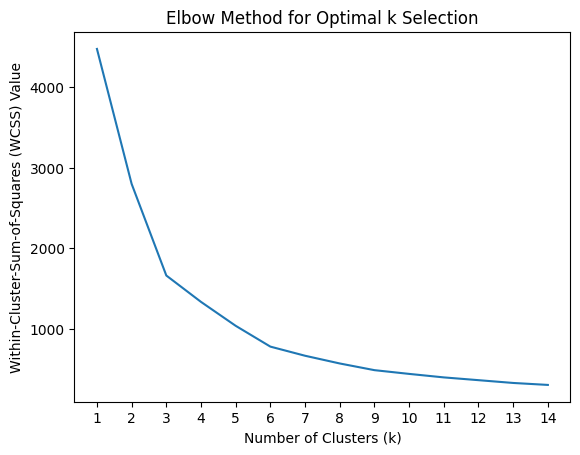

In [44]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.xlabel("Number of Clusters (k)")
plt.xticks(range(1, 15, 1))
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS) Value")
plt.title("Elbow Method for Optimal k Selection")
plt.show()

In [45]:
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data_pca)

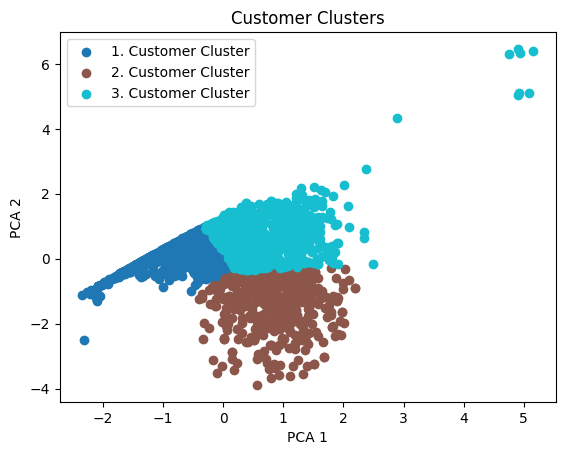

In [46]:
colors = plt.cm.get_cmap('tab10', 3)
for cluster_num in range(3):
    plt.scatter(data_pca[clusters == cluster_num, 0], 
                data_pca[clusters == cluster_num, 1], 
                label=f'{cluster_num + 1}. Customer Cluster', 
                color=colors(cluster_num))

plt.title('Customer Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()